# Estatística (Mestrado)

Base de dados utilizado: https://dados.gov.br/dados/conjuntos-dados/crimes-violentos

## Atividade 1

Montar tabela de distribuição de frequência em python

In [1]:
# !wget https://dados.mg.gov.br/dataset/87e4675b-bb0a-444a-ba0f-1463b893d01a/resource/bd02f7db-04cc-4149-98ee-e6fb2e713b04/download/crimes_violentos_2024.csv

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('crimes_violentos_2024.csv', sep=';')

In [4]:
df

,registros,natureza,municipio,cod_municipio,mes,ano,risp,rmbh
0,0,Estupro Consumado,ABADIA DOS DOURADOS,310010,1,2024,10,NÃO
1,0,Estupro Consumado,ABAETE,310020,1,2024,7,NÃO
2,0,Estupro Consumado,ABRE-CAMPO,310030,1,2024,12,NÃO
3,0,Estupro Consumado,ACAIACA,310040,1,2024,12,NÃO
4,1,Estupro Consumado,ACUCENA,310050,1,2024,12,NÃO
...,...,...,...,...,...,...,...,...
133063,0,Homicídio Consumado (Registros),VIRGOLANDIA,317190,12,2024,8,NÃO
133064,0,Homicídio Consumado (Registros),VISCONDE DO RIO BRANCO,317200,12,2024,4,NÃO
133065,0,Homicídio Consumado (Registros),VOLTA GRANDE,317210,12,2024,4,NÃO
133066,0,Homicídio Consumado (Registros),WENCESLAU BRAZ,317220,12,2024,17,NÃO


Obs: Para o exercicio 1 eu restringi a minha análise para o municipio de Belo Horizonte com crimes de Homicídio Consumado (Registros) para eu poder replicar no caderno para exercitar fazendo as contas e passos no caderno.

In [5]:
# Exercicio 1: Tabela de distribuição de frequencia

# Base de dados
df_bh = df[df['municipio'].str.upper() == 'BELO HORIZONTE']
df_bh_homicidio = df_bh[df_bh['natureza'] == 'Homicídio Consumado (Registros)']

df_dados = df_bh_homicidio['registros']
df_dados.sort_values()

123684    17
124537    26
129655    26
130508    26
126243    27
125390    28
127949    28
131361    28
132214    29
128802    30
133067    31
127096    34
Name: registros, dtype: int64

In [6]:
# Deixar em rol/ordenar
df_dados_rol = df_dados.sort_values()
menor_valor = df_dados_rol.iloc[0]
maior_valor = df_dados_rol.iloc[-1]

# Obter a amplitude total
amplitude_total = maior_valor - menor_valor

# Quantidade de classes (Sturges)
k = int(1 + 3.322 * np.log10(len(df_dados_rol)))

# Amplitude de cada classe
h = amplitude_total / k

print(f'amplitude total={amplitude_total} k={k} h={h}')

# Passo 1: criar os limites das classes
limites_classes = [menor_valor + i * h for i in range(k + 1)]

# Passo 2: calcular frequências
frequencias, _ = np.histogram(df_dados_rol, bins=limites_classes)

# Passo 3: calcular ponto médio de cada classe
classes = []
pontos_medios = []
for i in range(k):
    inferior = limites_classes[i]
    superior = limites_classes[i + 1]
    classes.append(f"{inferior:.2f} ⊢ {superior:.2f}")
    pontos_medios.append((inferior + superior) / 2)

# Frequência acumulada
frequencia_acumulada = np.cumsum(frequencias)

# Criar o DataFrame com a tabela
tabela_frequencia = pd.DataFrame({
    'Classe': classes,
    'Frequência (fi)': frequencias,
    'Pontos Médios (xi)': pontos_medios,
    'Frequência Acumulada (Fi)': frequencia_acumulada
})

# Exibir a tabela
print("\n Tabela de Distribuição de Frequência\n")
print(tabela_frequencia)

# Somatório de fi
print(f"\nSomatório de fi: {tabela_frequencia['Frequência (fi)'].sum()}")

amplitude total=17 k=4 h=4.25

 Tabela de Distribuição de Frequência

          Classe  Frequência (fi)  Pontos Médios (xi)  \
0  17.00 ⊢ 21.25                1              19.125   
1  21.25 ⊢ 25.50                0              23.375   
2  25.50 ⊢ 29.75                8              27.625   
3  29.75 ⊢ 34.00                3              31.875   

   Frequência Acumulada (Fi)  
0                          1  
1                          1  
2                          9  
3                         12  

Somatório de fi: 12


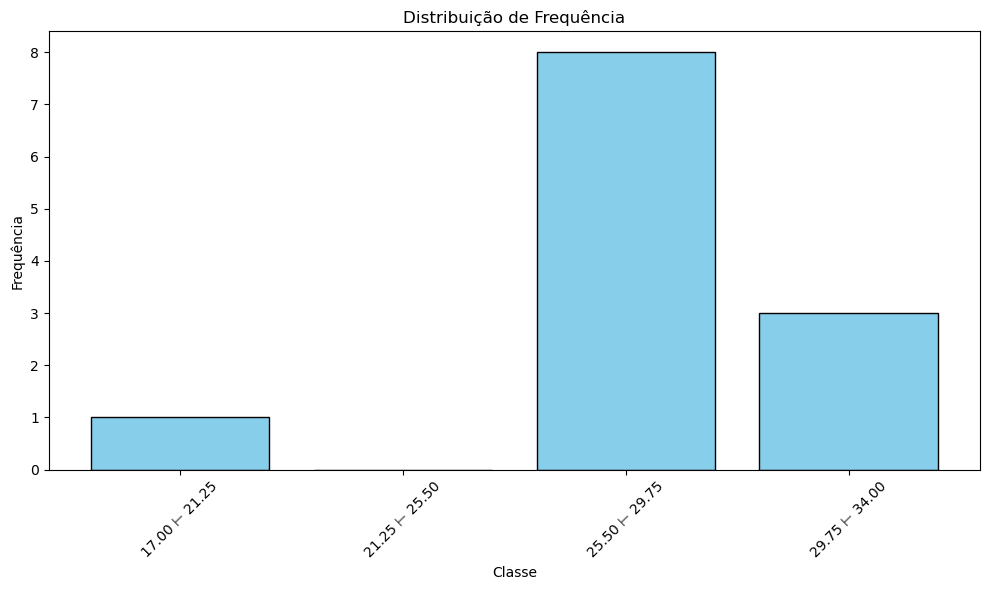

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(tabela_frequencia["Classe"], tabela_frequencia["Frequência (fi)"], color='skyblue', edgecolor='black')
plt.xticks(rotation=45)
plt.xlabel("Classe")
plt.ylabel("Frequência")
plt.title("Distribuição de Frequência")
plt.tight_layout()
plt.show()


In [8]:
df

,registros,natureza,municipio,cod_municipio,mes,ano,risp,rmbh
0,0,Estupro Consumado,ABADIA DOS DOURADOS,310010,1,2024,10,NÃO
1,0,Estupro Consumado,ABAETE,310020,1,2024,7,NÃO
2,0,Estupro Consumado,ABRE-CAMPO,310030,1,2024,12,NÃO
3,0,Estupro Consumado,ACAIACA,310040,1,2024,12,NÃO
4,1,Estupro Consumado,ACUCENA,310050,1,2024,12,NÃO
...,...,...,...,...,...,...,...,...
133063,0,Homicídio Consumado (Registros),VIRGOLANDIA,317190,12,2024,8,NÃO
133064,0,Homicídio Consumado (Registros),VISCONDE DO RIO BRANCO,317200,12,2024,4,NÃO
133065,0,Homicídio Consumado (Registros),VOLTA GRANDE,317210,12,2024,4,NÃO
133066,0,Homicídio Consumado (Registros),WENCESLAU BRAZ,317220,12,2024,17,NÃO



## Atividade 2

`Visualização dos dados em graficos`

Para cada uma das variáveis da base, plote os gráficos a seguir **e apresente o que se pode deduzir a partir de cada um dos gráficos**:

- a. Gráfico em linha
- b. Gráfico de área
- c. Gráfico de barras
- d. Histograma
- e. Gráfico de dispersão
- f. Gráfico de caixa
- g. Gráfico de pizza


Informações da base de dados:

- Registros: Quantidade de ocorrências registradas.
- Natureza: Natureza do crime cometido.
- Municipio: Nome do município em que ocorreu o crime.
- Código Município: Código do município.
- Mês: Mês em que ocorreu o fato.
- Ano: Ano em que ocorreu o fato.
- RISP: Número de identificação da Região Integrada de Segurança Pública.
- RMBH: Se pertence ou não à Região Metropolitana de Belo Horizonte.

### Gráfico em linha

<Axes: xlabel='Classe', ylabel='Frequência (fi)'>

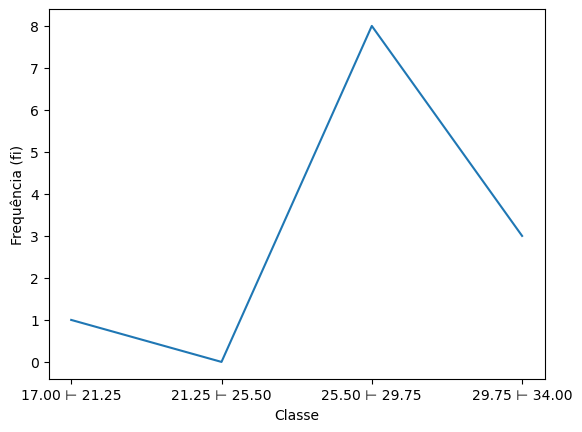

In [9]:
# Grafico em linha
sns.lineplot(x="Classe", y="Frequência (fi)",
             data=tabela_frequencia)


### Gráfico de Área

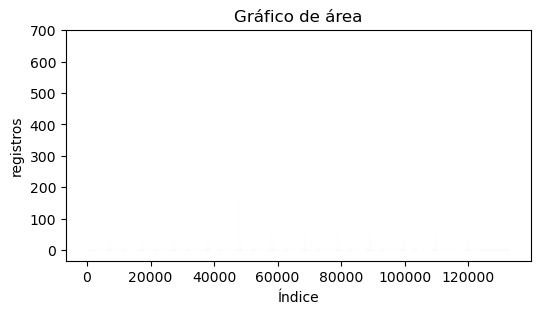

In [10]:
plt.figure(figsize=(6, 3))
plt.fill_between(df.index, df['registros'], alpha=0.5)
plt.title(f'Gráfico de área')
plt.xlabel('Índice')
plt.ylabel('registros')
plt.show()

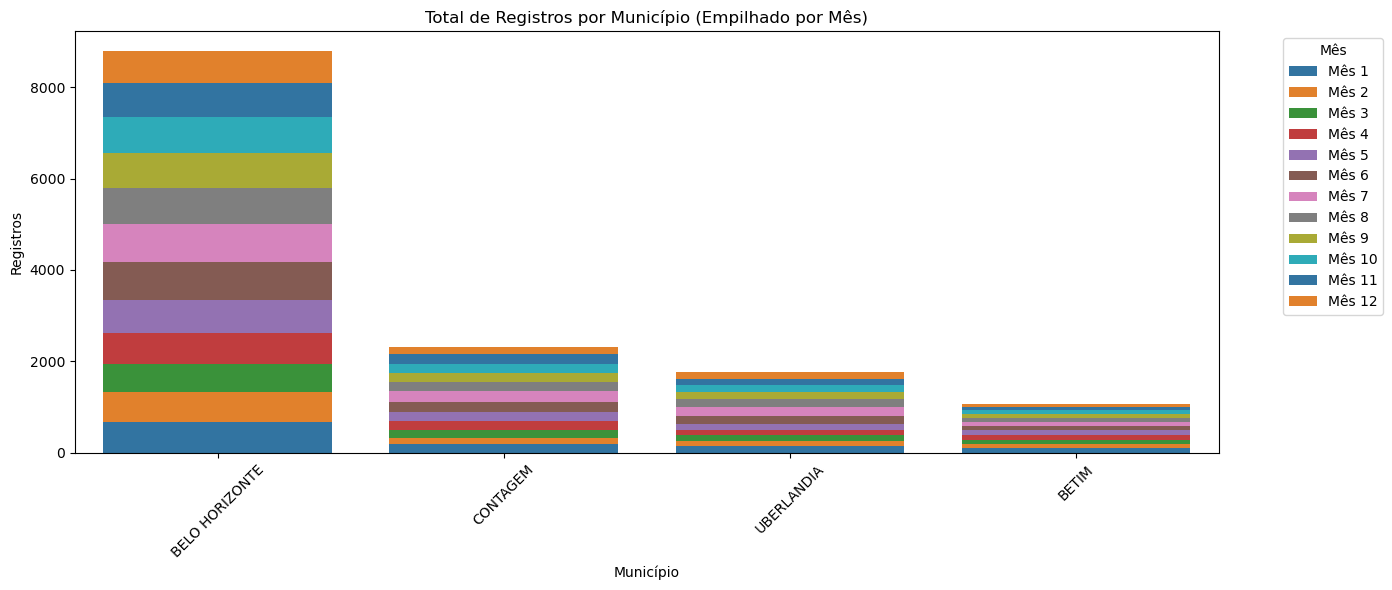

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupa os dados por município e mês
df_grouped = df.groupby(['municipio', 'mes'], as_index=False)['registros'].sum()

# Seleciona os 10 municípios com mais registros
municipios_top = (
    df_grouped.groupby('municipio')['registros']
    .sum()
    .sort_values(ascending=False)
    .head(4)
    .index
)

# Filtra os dados
df_top = df_grouped[df_grouped['municipio'].isin(municipios_top)]

# Reorganiza os dados em formato de pivot (para empilhamento manual)
df_pivot = df_top.pivot(index='municipio', columns='mes', values='registros').fillna(0)

# Ordena os municípios pela soma total
df_pivot = df_pivot.loc[df_pivot.sum(axis=1).sort_values(ascending=False).index]

# Cores para os meses
palette = sns.color_palette("tab10", n_colors=12)

# Plot
plt.figure(figsize=(14, 6))
bottom = None
for i, mes in enumerate(sorted(df_pivot.columns)):
    sns.barplot(
        x=df_pivot.index,
        y=df_pivot[mes],
        bottom=bottom,
        color=palette[i],
        label=f'Mês {mes}'
    )
    bottom = df_pivot.iloc[:, :i+1].sum(axis=1)

plt.title('Total de Registros por Município (Empilhado por Mês)')
plt.ylabel('Registros')
plt.xlabel('Município')
plt.xticks(rotation=45)
plt.legend(title='Mês', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Histograma

<Axes: xlabel='registros', ylabel='Count'>

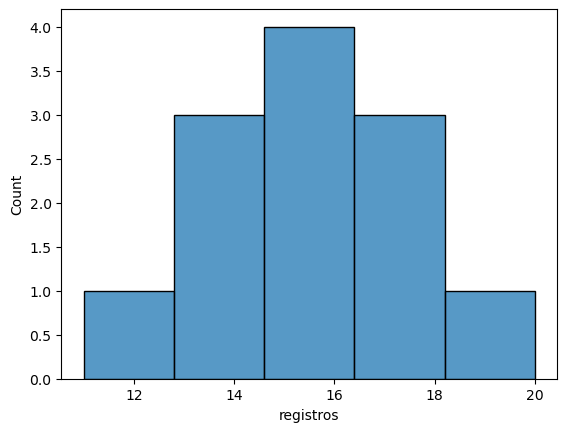

In [12]:
df_bh_estrupo = df_bh[df_bh['natureza'] == 'Estupro Consumado']

sns.histplot(
    df_bh_estrupo,
    x="registros"
)

### Gráfico de caixa

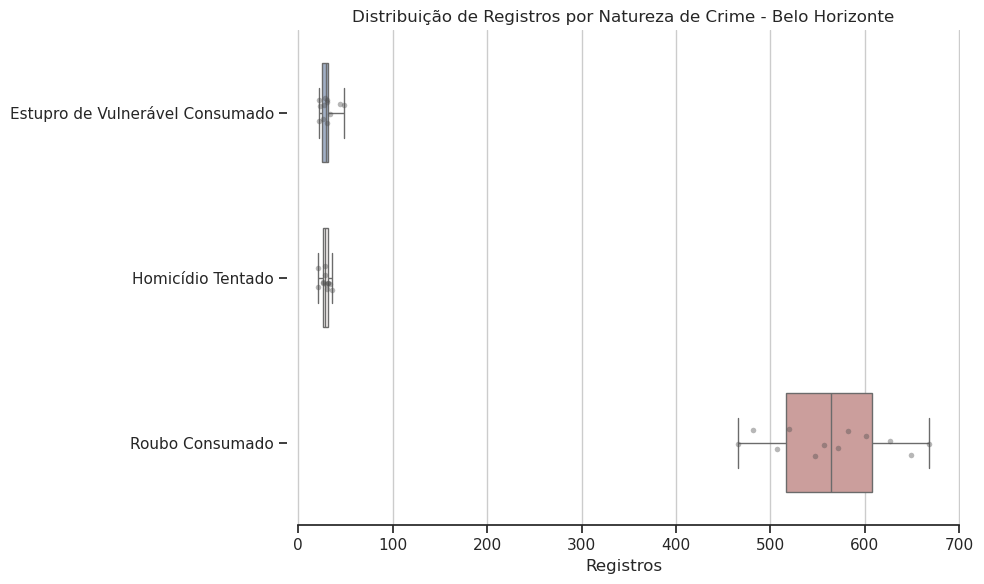

In [13]:
# 2. Soma total de registros por natureza
naturezas_top = (
    df_bh.groupby('natureza')['registros']
    .sum()
    .sort_values(ascending=False)
    .head(3)  # Top 5 naturezas, por exemplo
    .index
)

# 3. Filtra df_bh para manter apenas essas naturezas
df_bh_top = df_bh[df_bh['natureza'].isin(naturezas_top)]

# 4. Criação do gráfico
sns.set_theme(style="ticks")
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=df_bh_top, x="registros", y="natureza", hue="natureza",
    whis=[0, 100], width=0.6, palette="vlag"
)

# 5. Adiciona os pontos individuais
sns.stripplot(
    data=df_bh_top, x="registros", y="natureza", 
    size=4, color=".3", alpha=0.4, jitter=True
)

# 6. Ajustes finais
ax.xaxis.grid(True)
ax.set(ylabel="", xlabel="Registros", title="Distribuição de Registros por Natureza de Crime - Belo Horizonte")
sns.despine(trim=True, left=True)
plt.tight_layout()
plt.show()

### Gráfico de Pizza

In [14]:
df_bh

,registros,natureza,municipio,cod_municipio,mes,ano,risp,rmbh
65,20,Estupro Consumado,BELO HORIZONTE,310620,1,2024,1,NÃO
918,31,Estupro de Vulnerável Consumado,BELO HORIZONTE,310620,1,2024,1,NÃO
1771,1,Estupro de Vulnerável Tentado,BELO HORIZONTE,310620,1,2024,1,NÃO
2624,5,Estupro Tentado,BELO HORIZONTE,310620,1,2024,1,NÃO
3477,19,Extorsão Consumado,BELO HORIZONTE,310620,1,2024,1,NÃO
...,...,...,...,...,...,...,...,...
129655,26,Homicídio Consumado (Registros),BELO HORIZONTE,310620,8,2024,1,NÃO
130508,26,Homicídio Consumado (Registros),BELO HORIZONTE,310620,9,2024,1,NÃO
131361,28,Homicídio Consumado (Registros),BELO HORIZONTE,310620,10,2024,1,NÃO
132214,29,Homicídio Consumado (Registros),BELO HORIZONTE,310620,11,2024,1,NÃO


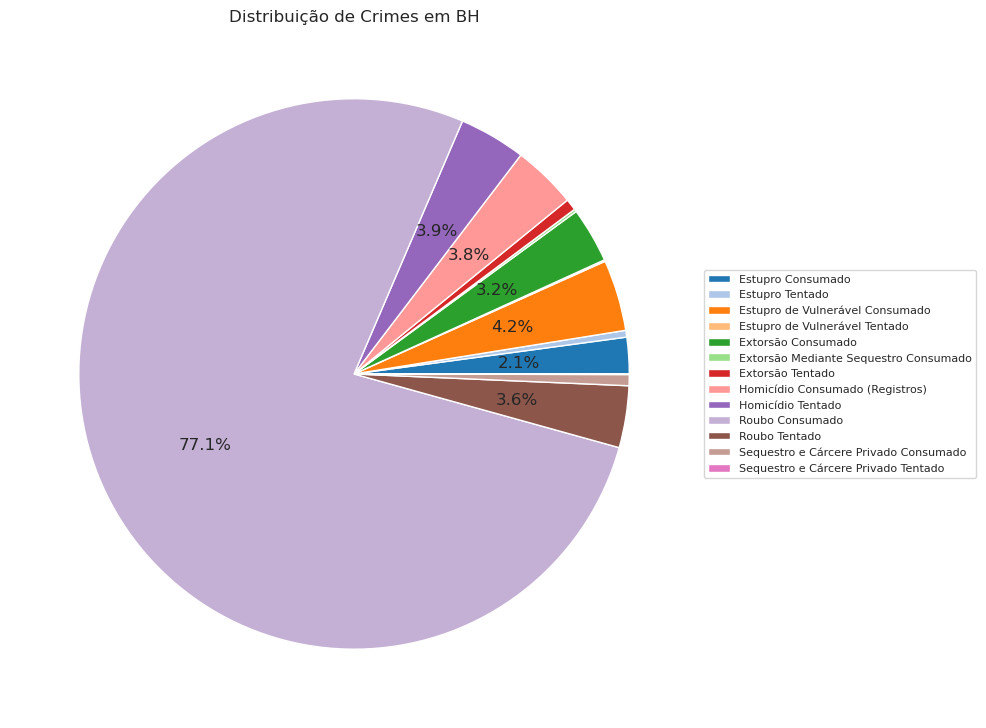

In [15]:
def format_pct(pct):
    return f'{pct:.1f}%' if pct > 2 else ''

df_bh_groupby = df_bh.groupby(['natureza'], as_index=False)['registros'].sum()

total = df_bh_groupby['registros'].sum()

# Define a coluna 'natureza' como índice para rótulos na legenda
df_bh_groupby = df_bh_groupby.set_index('natureza')
labels = df_bh_groupby.index.tolist()
n = len(df_bh_groupby)
cores = sns.color_palette("tab20", n)  # ou "hls", "Paired", "husl", etc.

# Gera o gráfico de pizza sem texto nos pedaços
ax = df_bh_groupby.plot.pie(
    y='registros',
    labels=None,         # Não coloca os nomes no gráfico
    autopct=format_pct,         # Não mostra os percentuais
    figsize=(10, 10),
    colors=cores,
    legend=False,
    # startangle=90        # (opcional) começa do topo
)

# Estética
plt.title('Distribuição de Crimes em BH')
plt.ylabel('')  # Remove o label do eixo Y
ax.legend(labels=labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
plt.tight_layout()



## Atividade 3

### Exercício 1.
Uma droga para alívio de asma pode ser comprada de cinco diferentes indústrias, em
forma líquida, tablete ou cápsula, todas com concentração regular ou extra. De quantas
maneiras diferentes um médico pode prescrever essa droga para o paciente que sofre
asma?

In [16]:
# RESPOSTA . . .

### Exercício 2.
Uma indústria automobilística está preocupada com um possível recall de seu sedã
quatro portas mais vendido. Se houver um recall há $0,25$ de probabilidade de que o
defeito seja no sistema de freios; $0,18$ de que seja na transmissão; $0,17$ de que seja no
sistema combustível e $0,40$ de que seja em alguma outra parte.
    
    a. Qual é a probabilidade de que o defeito esteja nos freios ou no sistema de combustível, se a probabilidade de defeitos em ambos os sistemas, simultaneamente, é de 015?
    b. Qual é a probabilidade de que não haja defeitos nem no sistema de freios nem no sistema de combustível?

In [17]:
# RESPOSTA . . .

### Exercício 3.
Procedimentos estatísticos são frequentemente usados para o controle de qualidade
industrial. Vamos supor que o peso de um produto é uma variável importante a ser
controlada. São dadas as especificações para peso de certo produto empacotado e o
pacote é rejeitado se estiver muito pesado ou muito leve. Em uma certa situação, os
dados históricos sugerem que $0,95$ é a probabilidade de que o produto atenda às
especificações de peso, enquanto $0,002$ é a probabilidade de que o produto seja leve
demais. Para cada pacote do produto o fabricante investe $\text{R\$} 20,00$ na produção e o
preço de compra pelo cliente é de $\text{R\$} 25,00$.

    a. Qual é a probabilidade de que um pacote escolhido aleatoriamente da linha de produção esteja muito pesado?
    b. Para cada $10.000$ pacotes vendidos, qual é o lucro do fabricante se todos os pacotes atendem à especificação?
    c. Assumindo que todos os pacotes defeituosos sejam rejeitados e não rendam lucro nenhum, de quanto será o lucro reduzido em $10.000$ pacotes devido à falha de não se atender às especificações?

In [18]:
# RESPOSTA . . .